In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

чтение данных и понижение регистра для удобного обращения к столбцам

In [2]:
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')
flights = pd.read_csv('flights.csv', low_memory=False)

airlines.columns = airlines.columns.str.lower()
airports.columns = airports.columns.str.lower()
flights.columns = flights.columns.str.lower()

In [3]:
airlines.head()

,iata_code,airline
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
airports.head()

,iata_code,airport,city,state,country,latitude,longitude
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [5]:
flights.head()

,year,month,day,day_of_week,airline,flight_number,tail_number,origin_airport,destination_airport,scheduled_departure,...,arrival_time,arrival_delay,diverted,cancelled,cancellation_reason,air_system_delay,security_delay,airline_delay,late_aircraft_delay,weather_delay
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


1.1

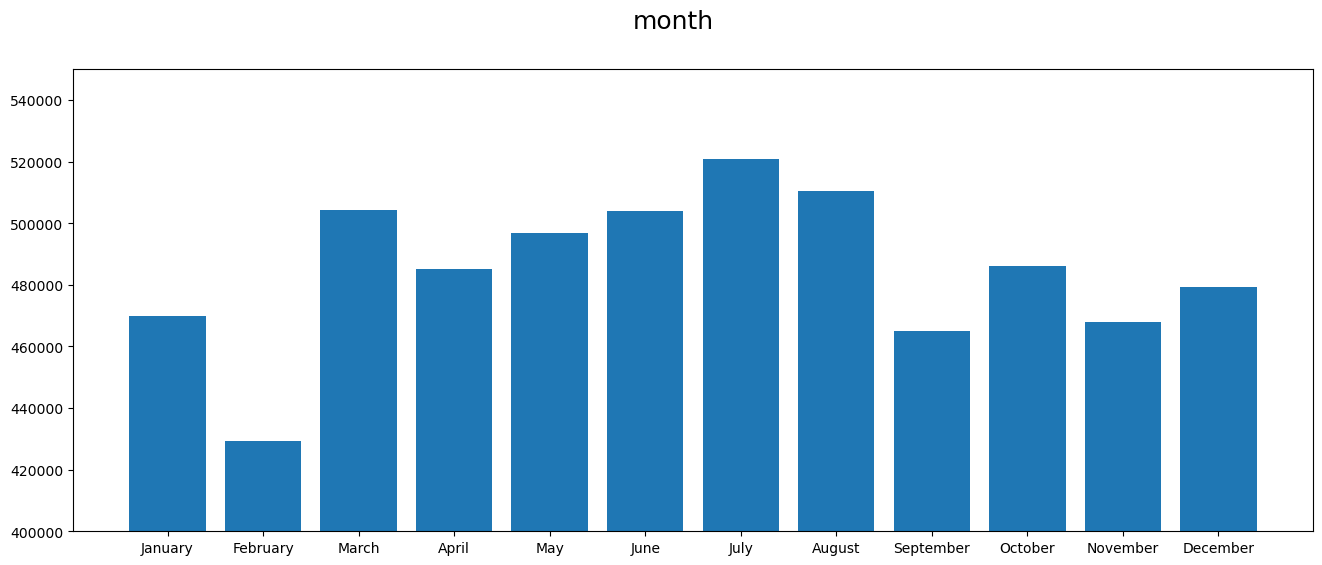

In [ ]:
df_stat = flights['flight_number'].groupby(flights['month']).count()
df_stat = df_stat.reset_index()
df_stat = df_stat.rename(columns={'flight_number':'count_flights'})
df_stat['month'] = pd.to_datetime(df_stat['month'], format='%m').dt.month_name()
plt.figure(figsize=(16, 6),)
plt.suptitle('month',fontsize=18)
plt.ylim(bottom  =400000, top = 550000 )
plt.bar(df_stat['month'], df_stat.count_flights)

plt.show()

1.2

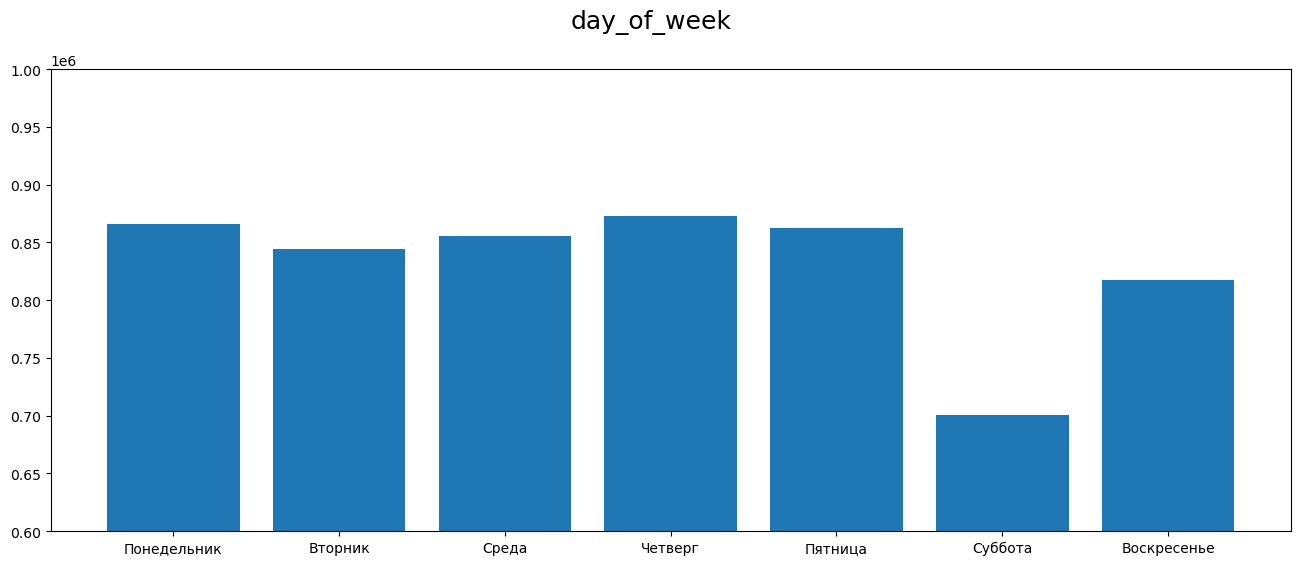

In [ ]:
day_week_dict = {
    1:'Понедельник',
    2:'Вторник',
    3:'Среда',
    4:'Четверг',
    5:'Пятница',
    6:'Суббота',
    7:'Воскресенье',
    
}

df_stat = flights['flight_number'].groupby(flights['day_of_week']).count()
df_stat = df_stat.reset_index()
df_stat = df_stat.rename(columns={'flight_number':'count_flights'})
df_stat.replace({'day_of_week':day_week_dict}, inplace=True)

plt.figure(figsize=(16, 6),)
plt.suptitle('day_of_week',fontsize=18)
plt.ylim(bottom  =600000, top = 1000000 )
plt.bar(df_stat['day_of_week'], df_stat.count_flights)

plt.show()

1.3

In [ ]:
origin = flights.origin_airport.value_counts()
destin = flights.destination_airport.value_counts()
sum_flight = origin.append(destin)
group_sum = sum_flight.groupby(sum_flight.index).sum()
airpors_group = pd.DataFrame(group_sum.sort_values(ascending=False), columns=['val'])
group_city = airports.set_index('iata_code').join(airpors_group)
group_city = pd.DataFrame(group_city.val.groupby(group_city.city).sum().nlargest(10))
group_city

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_18060\1837731630.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sum_flight = origin.append(destin)


,val
city,
Chicago,733560
Atlanta,693740
Dallas-Fort Worth,479133
Houston,397388
Denver,392065
Los Angeles,389369
New York,386806
San Francisco,295974
Phoenix,293627


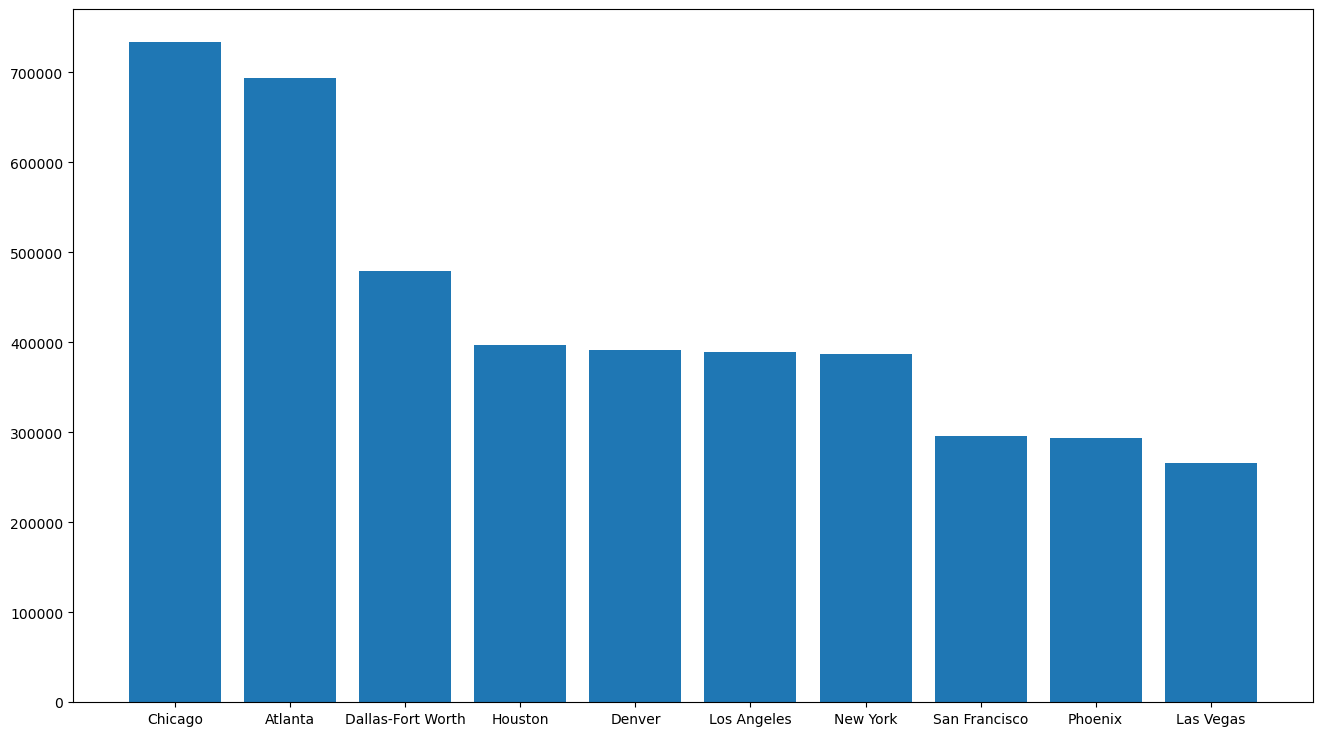

In [ ]:
plt.figure(figsize=(16, 9),)
plt.suptitle('',fontsize=18)

plt.bar(group_city.index , group_city.val)

plt.show()

1.4

In [ ]:
airlines_count = pd.DataFrame(flights.airline.value_counts())
airlines_count = airlines_count.join(airlines.set_index('iata_code'), lsuffix='_cnt').nlargest(10,'airline_cnt')

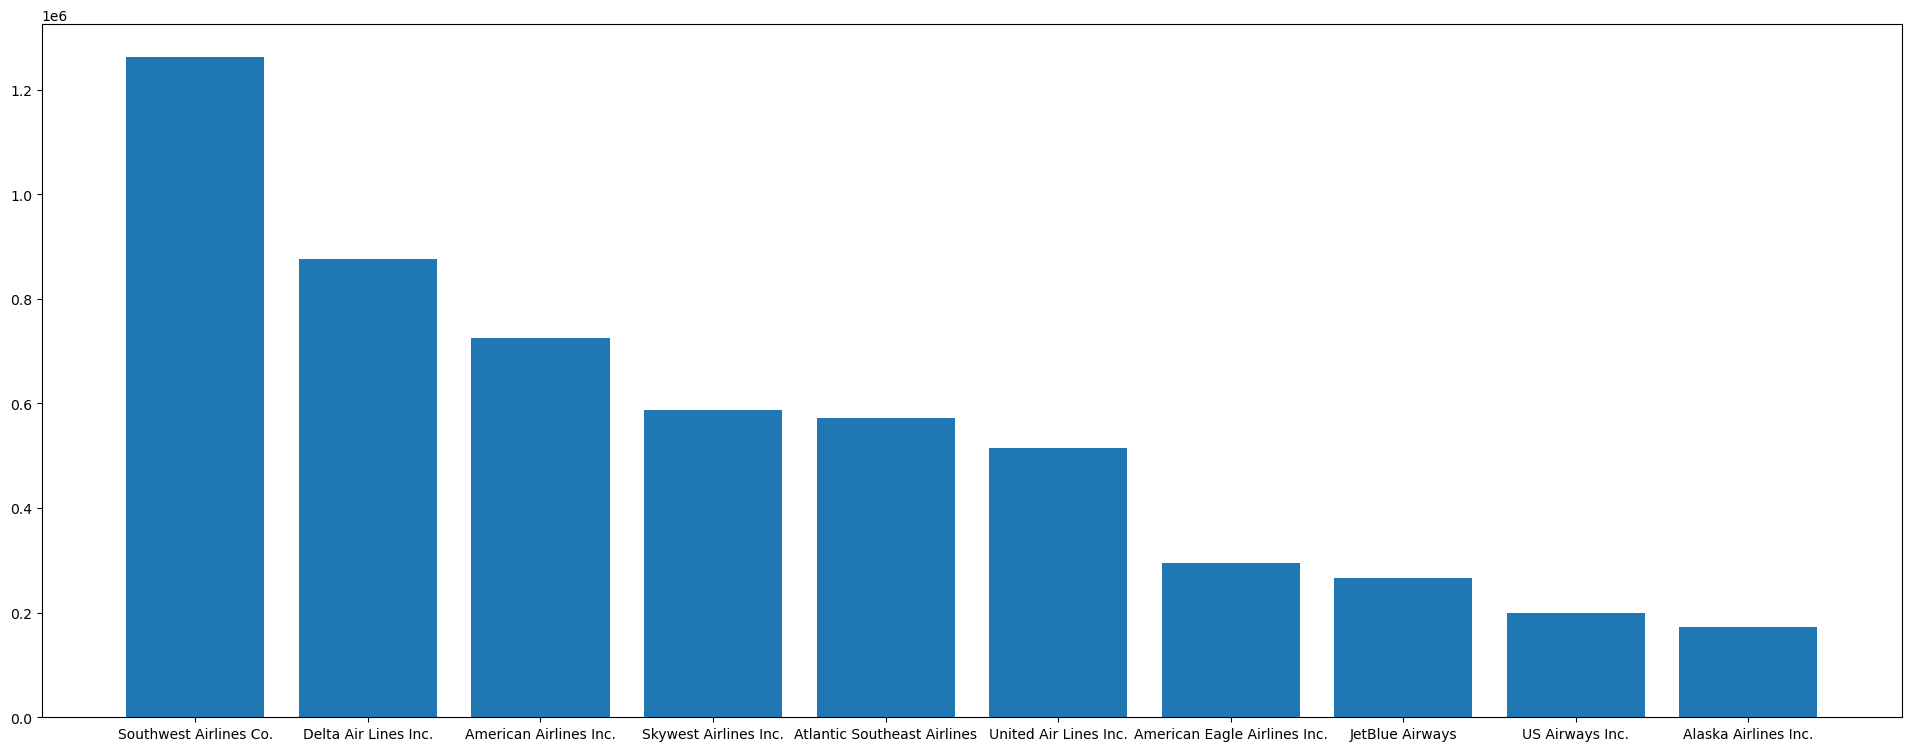

In [ ]:
plt.figure(figsize=(24, 9),)
plt.suptitle('',fontsize=18)

plt.bar(airlines_count.airline , airlines_count.airline_cnt)

plt.show()

In [ ]:
airlines_count

,airline_cnt,airline
WN,1261855,Southwest Airlines Co.
DL,875881,Delta Air Lines Inc.
AA,725984,American Airlines Inc.
OO,588353,Skywest Airlines Inc.
EV,571977,Atlantic Southeast Airlines
UA,515723,United Air Lines Inc.
MQ,294632,American Eagle Airlines Inc.
B6,267048,JetBlue Airways
US,198715,US Airways Inc.
AS,172521,Alaska Airlines Inc.


2.1

In [ ]:

group_city = airports.set_index('iata_code').join(
    flights.arrival_delay.groupby(
        flights.origin_airport ).mean(),
           rsuffix='val')
group_city = group_city[group_city['arrival_delay'] > 0 ].nsmallest(10, 'arrival_delay')
group_city = group_city[['airport', 'arrival_delay']].nsmallest(10, 'arrival_delay')
group_city

,airport,arrival_delay
iata_code,,
RKS,Rock Springs-Sweetwater County Airport,0.149254
RDD,Redding Municipal Airport,0.191218
BUF,Buffalo Niagara International Airport,0.295278
ITO,Hilo International Airport,0.343203
ECP,Northwest Florida Beaches International Airport,0.380043
PVD,Theodore Francis Green State Airport,0.400297
SYR,Syracuse Hancock International Airport,0.483569
PSC,Tri-Cities Airport,0.597744
GRI,Central Nebraska Regional Airport,0.701812


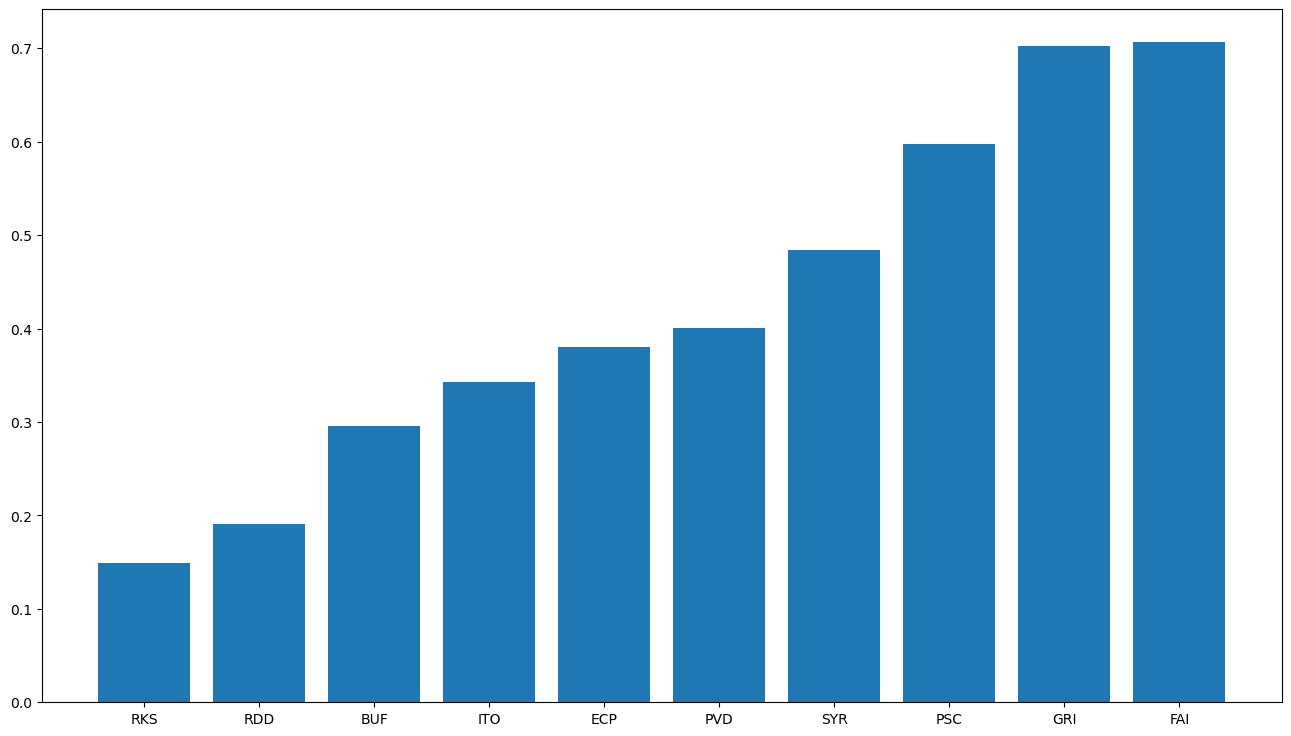

In [ ]:
plt.figure(figsize=(16, 9),)
plt.suptitle('',fontsize=18)

plt.bar(group_city.index , group_city.arrival_delay)

plt.show()

2.2

In [ ]:
airports[airports.index == 215]

,iata_code,airport,city,state,country,latitude,longitude
215,MSO,Missoula International Airport,Missoula,MT,USA,46.91631,-114.09056


In [ ]:
mso_arival = flights[flights.destination_airport=='PHL']
# airports[airports.index == 215] # MSO
airlines_delay = mso_arival.set_index('airline').join(airlines.set_index('iata_code'),lsuffix='_code')
airlines_delay = airlines_delay.arrival_delay.groupby(airlines_delay.index).mean().nsmallest(10)

airlines_delay = pd.DataFrame(airlines_delay)
airlines_delay

,arrival_delay
AS,-0.370482
AA,1.069260
US,4.214991
DL,4.467648
EV,4.913043
MQ,5.000000
B6,6.875638
WN,8.161509
UA,9.015912
OO,14.181818


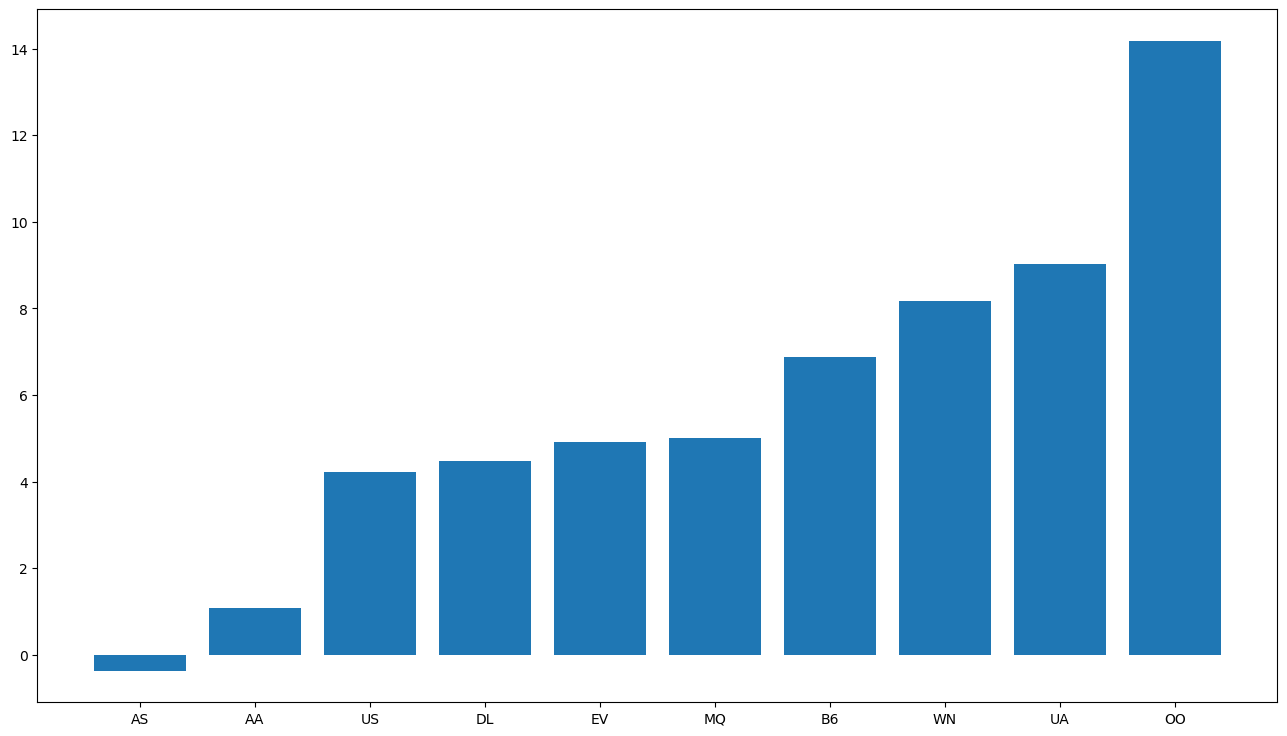

In [ ]:
plt.figure(figsize=(16, 9),)
plt.suptitle('',fontsize=18)

plt.bar(airlines_delay.index , airlines_delay.arrival_delay)

plt.show()

2.3

In [ ]:
airport_taxing_out = flights.taxi_out.groupby(flights.origin_airport).mean()
airport_taxing_in = flights.taxi_in.groupby(flights.destination_airport).mean()
airport_taxing = pd.DataFrame(airport_taxing_out.append(airport_taxing_in))


airport_taxing = airport_taxing.groupby(airport_taxing.index).mean()
airport_taxing = airports.set_index('iata_code').join(
airport_taxing )

airport_taxing = airport_taxing[['airport',0]].nlargest(10, 0)
airport_taxing = airport_taxing.rename(columns={0:'avg_taxing'}).nlargest(10, 'avg_taxing')

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_18060\2151302251.py:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  airport_taxing = pd.DataFrame(airport_taxing_out.append(airport_taxing_in))


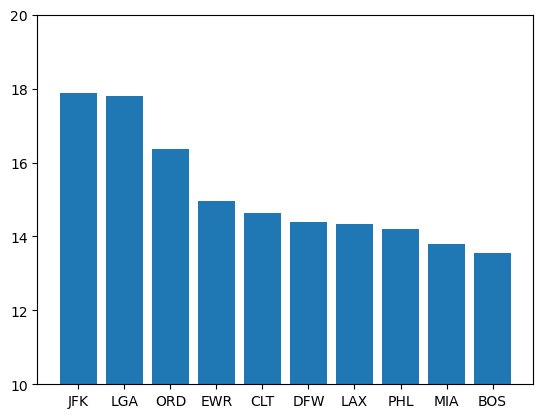

In [ ]:
plt.figure(figsize=(16, 9),)
plt.suptitle('',fontsize=18)
plt.ylim(bottom  =10, top = 20 )

plt.bar(airport_taxing.index , airport_taxing.avg_taxing)

plt.show()